# Import Modules
You may need to install some of them.

In [6]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

In [7]:
img = convert(Array{Float32}, channelview(load("obj.tif")))
psf = ifftshift(convert(Array{Float32}, channelview(load("psf.tif"))))
psf ./= sum(psf)
# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2, 3])
img_n = poisson(img_b, 300);

In [8]:
# the regularizer must be now adapted since we want to have
# a 3D one
reg1 = TV(num_dims=3, sum_dims=[1, 2, 3])
reg2 = Tikhonov(num_dims=3, sum_dims=[1, 2, 3])

#65 (generic function with 1 method)

In [9]:
@time res, ores = deconvolution(img, psf, regularizer=reg1, loss=Poisson(),
                          λ=0.02, padding=0.2, iterations=6);
@time res2, ores = deconvolution(img, psf, regularizer=reg2, loss=Poisson(),
                          λ=0.001, padding=0.0, iterations=6);

  4.000035 seconds (2.23 M allocations: 2.295 GiB, 10.86% gc time)
  1.841287 seconds (1.86 M allocations: 738.225 MiB, 3.76% gc time)


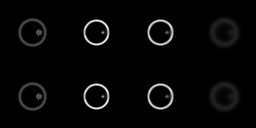

In [10]:
img_comb1 = [img[:, : ,32] res2[:, :, 32] res[:, :, 32] img_n[:, :, 32]]
img_comb2 = [img[:, : ,32] res2[:, :, 32] res[:, :, 32] img_n[:, :, 32]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)


imshow([img[:, :, 20:end] res2[:, :, 20:end] res[:, :, 20:end] img_n[:, :, 20:end]])
colorview(Gray, img_comb)